<a href="https://colab.research.google.com/github/bonyuta0204/gis-exploration/blob/main/Introduction_to_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import geopandas as gpd


In [3]:
!wget https://github.com/AutoGIS/data/raw/master/L2_data.zip
!unzip L2_data.zip
!ls L2_data

--2024-09-16 11:07:09--  https://github.com/AutoGIS/data/raw/master/L2_data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip [following]
--2024-09-16 11:07:10--  https://raw.githubusercontent.com/AutoGIS/data/master/L2_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12116862 (12M) [application/zip]
Saving to: ‘L2_data.zip’

L2_data.zip         100%[===================>]  11.55M  --.-KB/s    in 0.1s    

2024-09-16 11:07:10 (110 MB/s) - ‘L2_data.zip’ saved [12116862/12116862]

Archive:  L2_data.zip
   creating: L2_data/
 extracting: L2_data/Europe_borde

In [4]:
import os

# Define path to folder
input_folder = r"L2_data/NLS/2018/L4/L41/L4132R.shp"

# Join folder path and filename
fp = os.path.join(input_folder, "m_L4132R_p.shp")

# Print out the full file path
print(fp)

L2_data/NLS/2018/L4/L41/L4132R.shp/m_L4132R_p.shp


In [5]:
import geopandas as gpd

# Read file using gpd.read_file()
data = gpd.read_file(fp)

In [6]:
# rename columns from FINNISH to ENGLISH
data = data[['RYHMA', 'LUOKKA',  'geometry']]
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
data.rename(columns=colnames, inplace=True)

data.head()


,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


<Axes: >

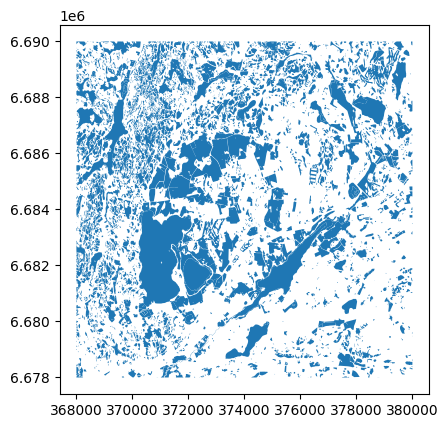

In [7]:
data.plot()

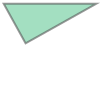

In [8]:
data.at[0, "geometry"]


In [9]:
# Iterate over rows and print the area of a Polygon
for index, row in data[0:5].iterrows():

    # Get the area from the shapely-object stored in the geometry-column
    poly_area = row['geometry'].area

    # Print info
    print("Polygon area at index {index} is: {area:.0f} square meters".format(index=index, area=poly_area))


Polygon area at index 0 is: 76 square meters
Polygon area at index 1 is: 2652 square meters
Polygon area at index 2 is: 3186 square meters
Polygon area at index 3 is: 13075 square meters
Polygon area at index 4 is: 3981 square meters


In [10]:
# Create a new column called 'area'
data['area'] = data.area

In [11]:
data['area']

,area
0,76.027392
1,2652.054186
2,3185.649995
3,13075.165279
4,3980.682621
...,...
4306,2651.800270
4307,376.503380
4308,413.942555
4309,3487.927677


In [12]:
# Select a class
selection = data.loc[data["CLASS"]==36200]

<Axes: >

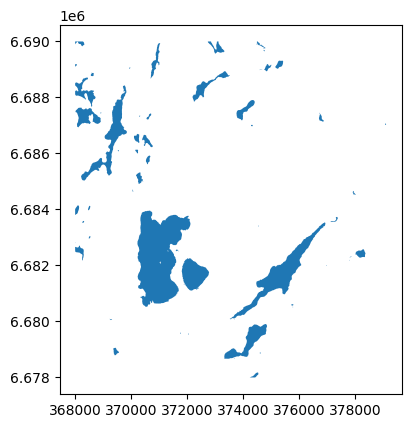

In [13]:
selection.plot()

## Tutorial for CRS

In [14]:
fp = "L2_data/Europe_borders.shp"
data = gpd.read_file(fp)


In [23]:
# Let's make a backup copy of our data
data_wgs84 = data.copy()
# Reproject the data
data = data.to_crs(epsg=3035)
# Check the new geometry values
data['geometry'].head()

,geometry
0,"POLYGON ((4221214.558 3496203.404, 4220681.651..."
1,"POLYGON ((4224860.478 2732279.320, 4224932.819..."
2,"POLYGON ((4104652.176 3390034.953, 4104460.401..."
3,"POLYGON ((4113025.664 3391895.756, 4112879.943..."
4,"POLYGON ((4115871.228 3395282.099, 4114921.348..."


In [25]:
data_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

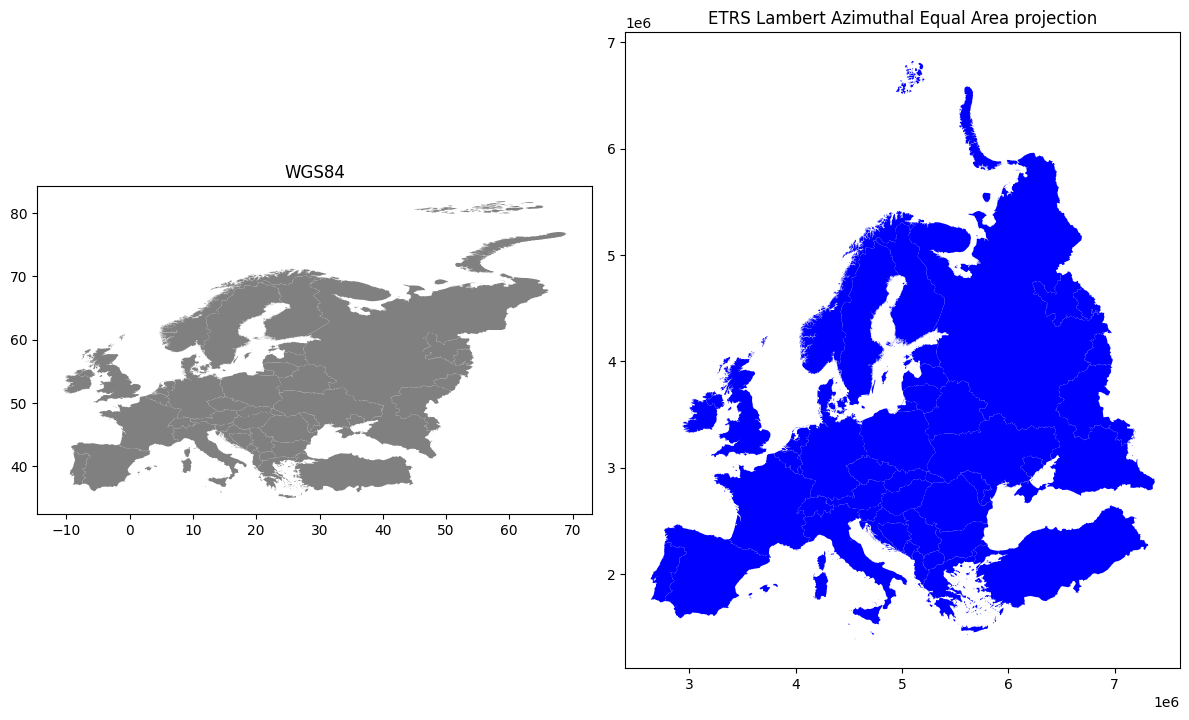

In [29]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor='gray')

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue')

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

plt.show()

## Global Data CRS

In [30]:
# Read in data
fp = "L2_data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
admin = gpd.read_file(fp)


In [31]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
mercator = admin.copy()
mercator.to_crs(epsg=3857, inplace=True)

<Axes: >

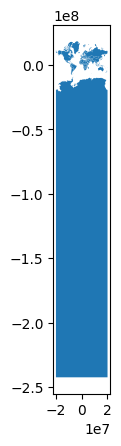

In [46]:
mercator.plot()

In [50]:
### Import CRS class from pyproj
from pyproj import CRS

<Axes: >

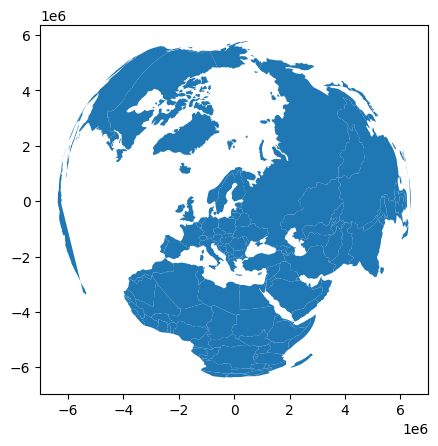

In [52]:
ortho = CRS.from_proj4("+proj=ortho +lat_0=60.00 +lon_0=23.0000 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

# Re-project and plot
admin.to_crs(ortho).plot()